## Loading dataset

In [68]:
import pandas as pd

# Datasets
# https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis
# https://huggingface.co/datasets/BrunoGR/Twitter_Sentiment_Analysis_Train_Corpus_in_Spanish

df_train_english = pd.read_csv('data/train_english.txt', sep='\t', names=('senti', 'tweet')) 
df_test_english = pd.read_csv('data/test_english.txt', sep='\t', names=('senti', 'tweet')) 

df_train_spanish = pd.read_parquet('data/train_spanish.parquet')
df_test_spanish = pd.read_parquet('data/test_spanish.parquet')

df_train_spanish.rename(columns={'etiqueta': 'senti', 'texto': 'tweet'}, inplace=True)
df_test_spanish.rename(columns={'etiqueta': 'senti', 'texto': 'tweet'}, inplace=True)

# English
print("English: ", df_train_english.shape, df_test_english.shape)
# Spanish
print("Spanish: ", df_train_spanish.shape, df_test_spanish.shape)

English:  (149985, 2) (61998, 2)
Spanish:  (1082821, 2) (334641, 2)


In [69]:
from sklearn.model_selection import train_test_split

# Reducing dataset size
_ , df_train_spanish = train_test_split(df_train_spanish, test_size=0.15, random_state=42)
_ , df_test_spanish = train_test_split(df_train_spanish, test_size=0.25, random_state=42)

print("Spanish: ", df_train_spanish.shape, df_test_spanish.shape)

Spanish:  (162424, 2) (40606, 2)


In [70]:
# Split test dataset into validation and test

df_val_english, df_test_english = train_test_split(df_test_english, test_size=0.5, random_state=42)
df_val_spanish, df_test_spanish = train_test_split(df_test_spanish, test_size=0.5, random_state=42)

# Final dataset

# English
print("English: ", df_train_english.shape, df_val_english.shape, df_test_english.shape)
# Spanish
print("Spanish: ", df_train_spanish.shape, df_val_spanish.shape, df_test_spanish.shape)

English:  (149985, 2) (30999, 2) (30999, 2)
Spanish:  (162424, 2) (20303, 2) (20303, 2)


In [71]:
print(df_train_english['senti'].value_counts())
print(df_test_english['senti'].value_counts())
print(df_val_english['senti'].value_counts())

0    75019
1    74966
Name: senti, dtype: int64
0    15568
1    15431
Name: senti, dtype: int64
1    15598
0    15401
Name: senti, dtype: int64


In [72]:
print(df_train_spanish['senti'].value_counts())
print(df_test_spanish['senti'].value_counts())
print(df_val_spanish['senti'].value_counts())

Sentimiento: Negativo    81752
Sentimiento: Positivo    80672
Name: senti, dtype: int64
Sentimiento: Negativo    10352
Sentimiento: Positivo     9951
Name: senti, dtype: int64
Sentimiento: Negativo    10266
Sentimiento: Positivo    10037
Name: senti, dtype: int64


In [77]:
df_train_spanish

,senti,tweet
444924,0,@USUARIO Sin comentarios en el Myspace de Krys...
481203,0,"@USUARIO yo también, ¡pero no tengo alcohol! h..."
719351,0,el hombro y la espalda me duelen como un ab*tc...
896245,0,¡Los muebles de Ikea son geniales! Solo desear...
258358,1,"Comí demasiado tarde, ahora todo lo que tengo ..."
...,...,...
705137,1,@USUARIO La próxima vez que hablemos por teléf...
787711,1,luv 2 tweeps brindando una ayuda 2 entre sí en...
583300,0,@USUARIO Supongo que no revisé los nuevos mapa...
961480,0,@USER Pero solo demuestra que Swisscom estaba ...


In [75]:
# Pre-processing
df_train_spanish['senti'] = df_train_spanish['senti'].str.replace('Sentimiento: ', '', regex=True)
df_train_spanish['senti'] = df_train_spanish['senti'].replace({'Negativo': 0, 'Positivo': 1})
df_train_spanish['tweet'] = df_train_spanish['tweet'].str.replace(r'^Consulta: <\s*', '', regex=True)
df_train_spanish['tweet'] = df_train_spanish['tweet'].str.rstrip('>\n')

In [ ]:
# Split 80% training, 10% validation and 10% testing
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

print(df_train.shape, df_val.shape, df_test.shape)

df_train_spanish, df_test_english = train_test_split(df_train, test_size=0.5, random_state=42)

In [42]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# file_path_train = 'train-00000-of-00001-538f353c0fff1a21.parquet'
# file_path_test = 'test-00000-of-00001-d883ec96ee767edd.parquet'

# df_train = pd.read_parquet(file_path_train)
# df_test = pd.read_parquet(file_path_test)

# df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

# print(df_train.shape, df_val.shape, df_test.shape)

(1082821, 2) (167320, 2) (167321, 2)


## Data preprocessing

In [45]:

def preprocess(df):
    # Etiquetas
    df['etiqueta'] = df['etiqueta'].str.replace('Sentimiento: ', '', regex=True)
    df['etiqueta'] = df['etiqueta'].replace({'Negativo': 0, 'Positivo': 1})

    # Tweets
    df['texto'] = df['texto'].str.replace(r'^Consulta: <\s*', '', regex=True)
    df['texto'] = df['texto'].str.rstrip('>\n')

preprocess(df_train)
preprocess(df_val)
preprocess(df_test)



In [50]:

print(df_train.columns)
print(df_train)
df_train.to_csv('data.csv')

Index(['etiqueta', 'texto'], dtype='object')
         etiqueta                                              texto
0               0  @USUARIO Mi pobre y pequeña bola de masa En lo...
1               0  Me voy demasiado a la cama. Tengo que levantar...
2               0  Todavía no he podido escucharlo. Mis parlantes...
3               0  ahora recuerda por qué resolver una ecuación r...
4               0                      Comí demasiado, me siento mal
...           ...                                                ...
1082816         0  Hoy vi a mucha gente que extrañé... Quiero volver
1082817         1                                         - Me gusta
1082818         1  arando a través de las asignaciones pero miran...
1082819         1  @USUARIO No veo la hora de ver a Joseph en su ...
1082820         1  @USUARIO Lugares bastante fantásticos. El tiem...

[1082821 rows x 2 columns]


KeyError: "[''] not found in axis"

0    75019
1    74966
Name: senti, dtype: int64


Text(0.5, 1.0, 'Frecuencia de tweets en inglés positivos y negativos')

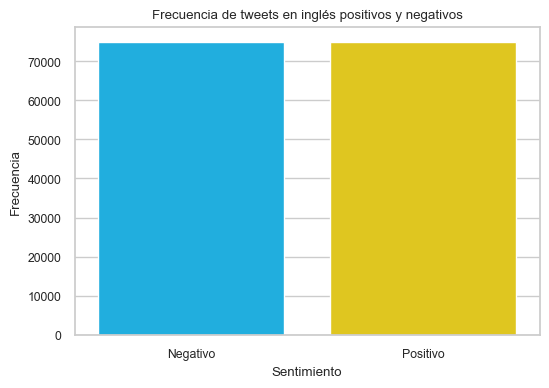

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams


# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=0.8)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 6, 4

count = df_train_english['senti'].value_counts()
print(count)

sns.barplot(x=['Negativo', 'Positivo'], y=count.values)

plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de tweets positivos y negativos en inglés (train dataset)')


## BERT

In [22]:
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

c:\Users\LENOVO\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [31]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df_train['texto']:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11356\1423724872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

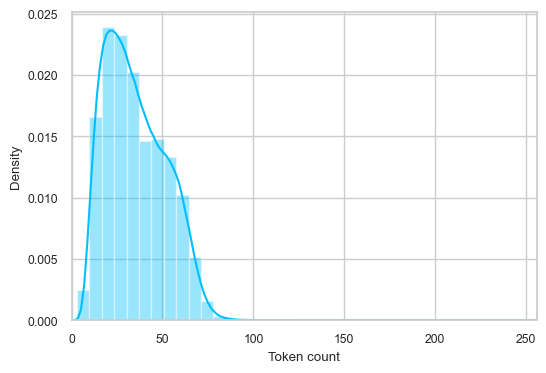

In [32]:
sns.distplot(token_lens)
plt.xlim([0, 256])
plt.xlabel('Token count')

# MAX_LEN = 100

In [33]:
MAX_LEN = 100

In [38]:
# Torch ML libraries
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }
    
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.texto.to_numpy(),
        targets=df.etiqueta.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [41]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 100])
torch.Size([16, 100])
torch.Size([16])


c:\Users\LENOVO\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [1]:
from transformers import BertModel

MODEL_NAME = 'bert-base-cased'

bert_model = BertModel.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

c:\Users\LENOVO\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions